In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
dpi = 200


In [2]:
original_warp_params = np.asarray(pickle.load(open('output/warp_params.pkl', 'rb')))
original_frame_nums = pickle.load(open('output/frame_nums.pkl', 'rb'))
detected_frame_nums = pickle.load(open('output/detected_frame_numbers.pkl', 'rb'))
kalman_filtered_warp = pickle.load(open('output/kalman_filter.pkl', 'rb'))

In [7]:
kalman_filtered_warp.estimated_signal

array([[ 0.00000000e+00,  2.87069901e-03,  1.99020556e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.41607601e-04, -2.81482737e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  4.41607601e-04,  2.81482737e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  2.87069901e-03,  1.13682262e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -7.12022128e-01, -2.84682650e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.94116634e-01, -1.52824500e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [8]:
missed_frame_nums = list(set(detected_frame_nums).difference(set(original_frame_nums)))
missed_frame_nums.sort()

Text(0.5, 1.0, 'G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

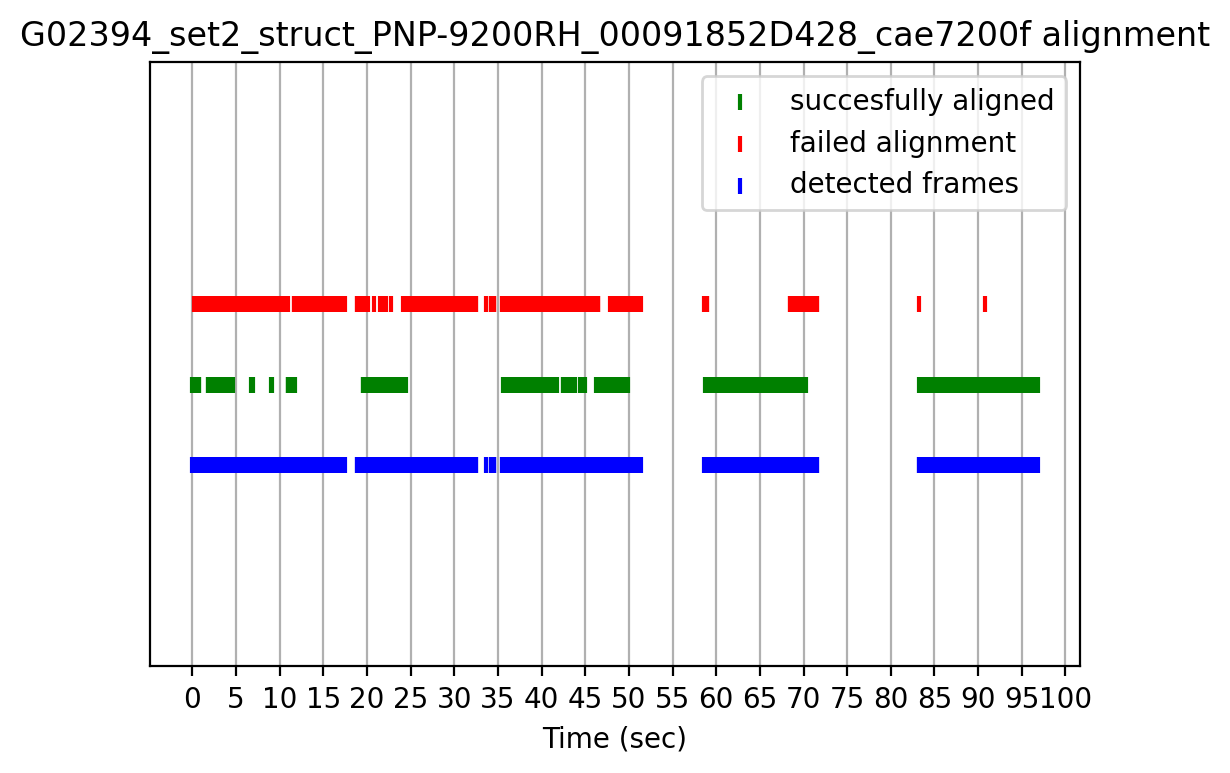

In [9]:
fig = plt.figure(facecolor='white', dpi=dpi)
ax = plt.gca()
ax.set_axisbelow(True)

offset = 0.01

plt.scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
plt.scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
plt.scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
plt.ylim([-0.025, 0.05])
plt.legend()
plt.xticks(range(0, 101, 5))
plt.yticks([])
plt.grid()
plt.xlabel('Time (sec)')
plt.title('G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

In [11]:
original_warp_params.shape

(1086, 6)

2203

In [13]:
kalman_filtered_warp.estimated_signal.shape

(12, 2909)

In [16]:
len(range(0, kalman_filtered_warp.estimated_signal.shape[1]))

2909

In [21]:
kalman_filtered_warp.estimated_signal.transpose().shape

(2909, 12)

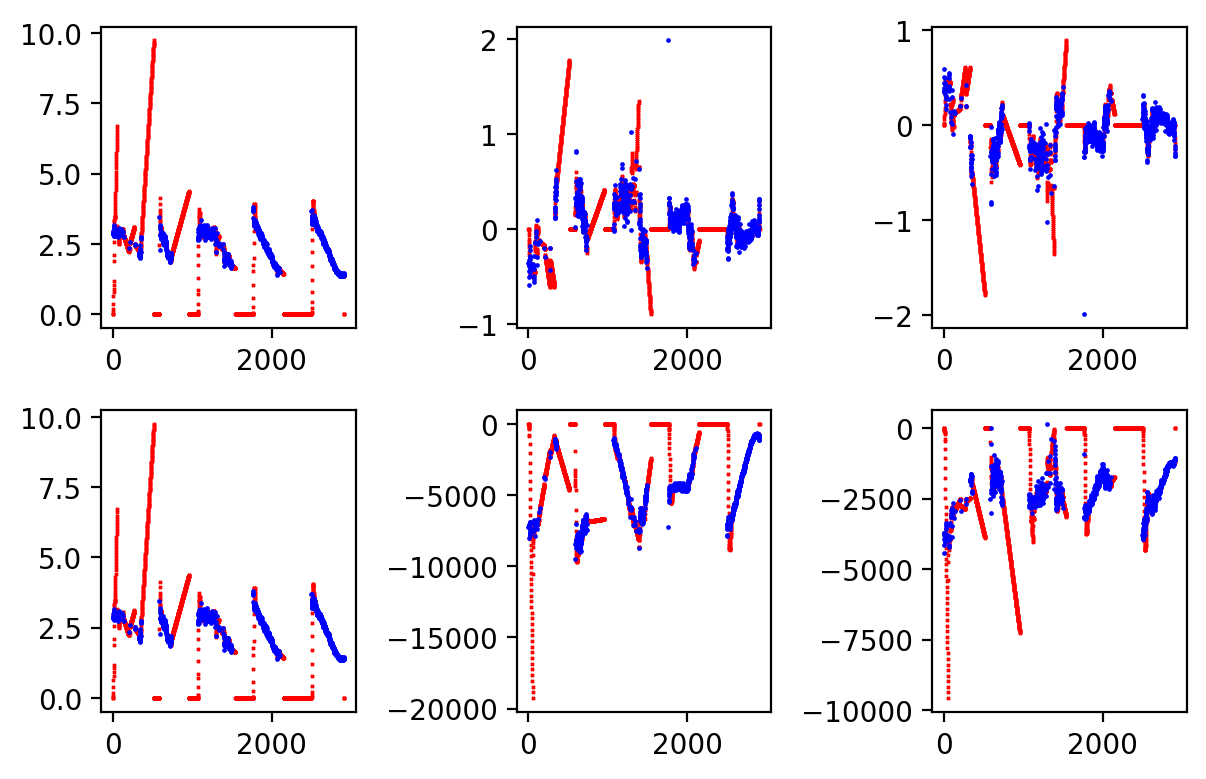

In [26]:
fig, ax = plt.subplots(2, 3, facecolor='white', dpi=dpi)

# for ii in range(original_warp_params.shape[0]):
#     for jj in range(original_warp_params.shape[2]):
#         ax[ii, jj].scatter(original_frame_nums, original_warp_params[:, ii, jj], s=0.5)

for jj in range(original_warp_params.shape[1]):
    ax[int(jj/3), jj % 3].scatter(range(0, kalman_filtered_warp.estimated_signal.shape[1]),
                                  kalman_filtered_warp.estimated_signal.transpose()[:, jj], s=0.3,
                                 marker='x',
                                 color='r')

for jj in range(original_warp_params.shape[1]):
    ax[int(jj/3), jj % 3].scatter(original_frame_nums, original_warp_params[:, jj], s=0.5, color='b')

fig.tight_layout()

In [ ]:
np.asarray(original_warp_params).shape

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


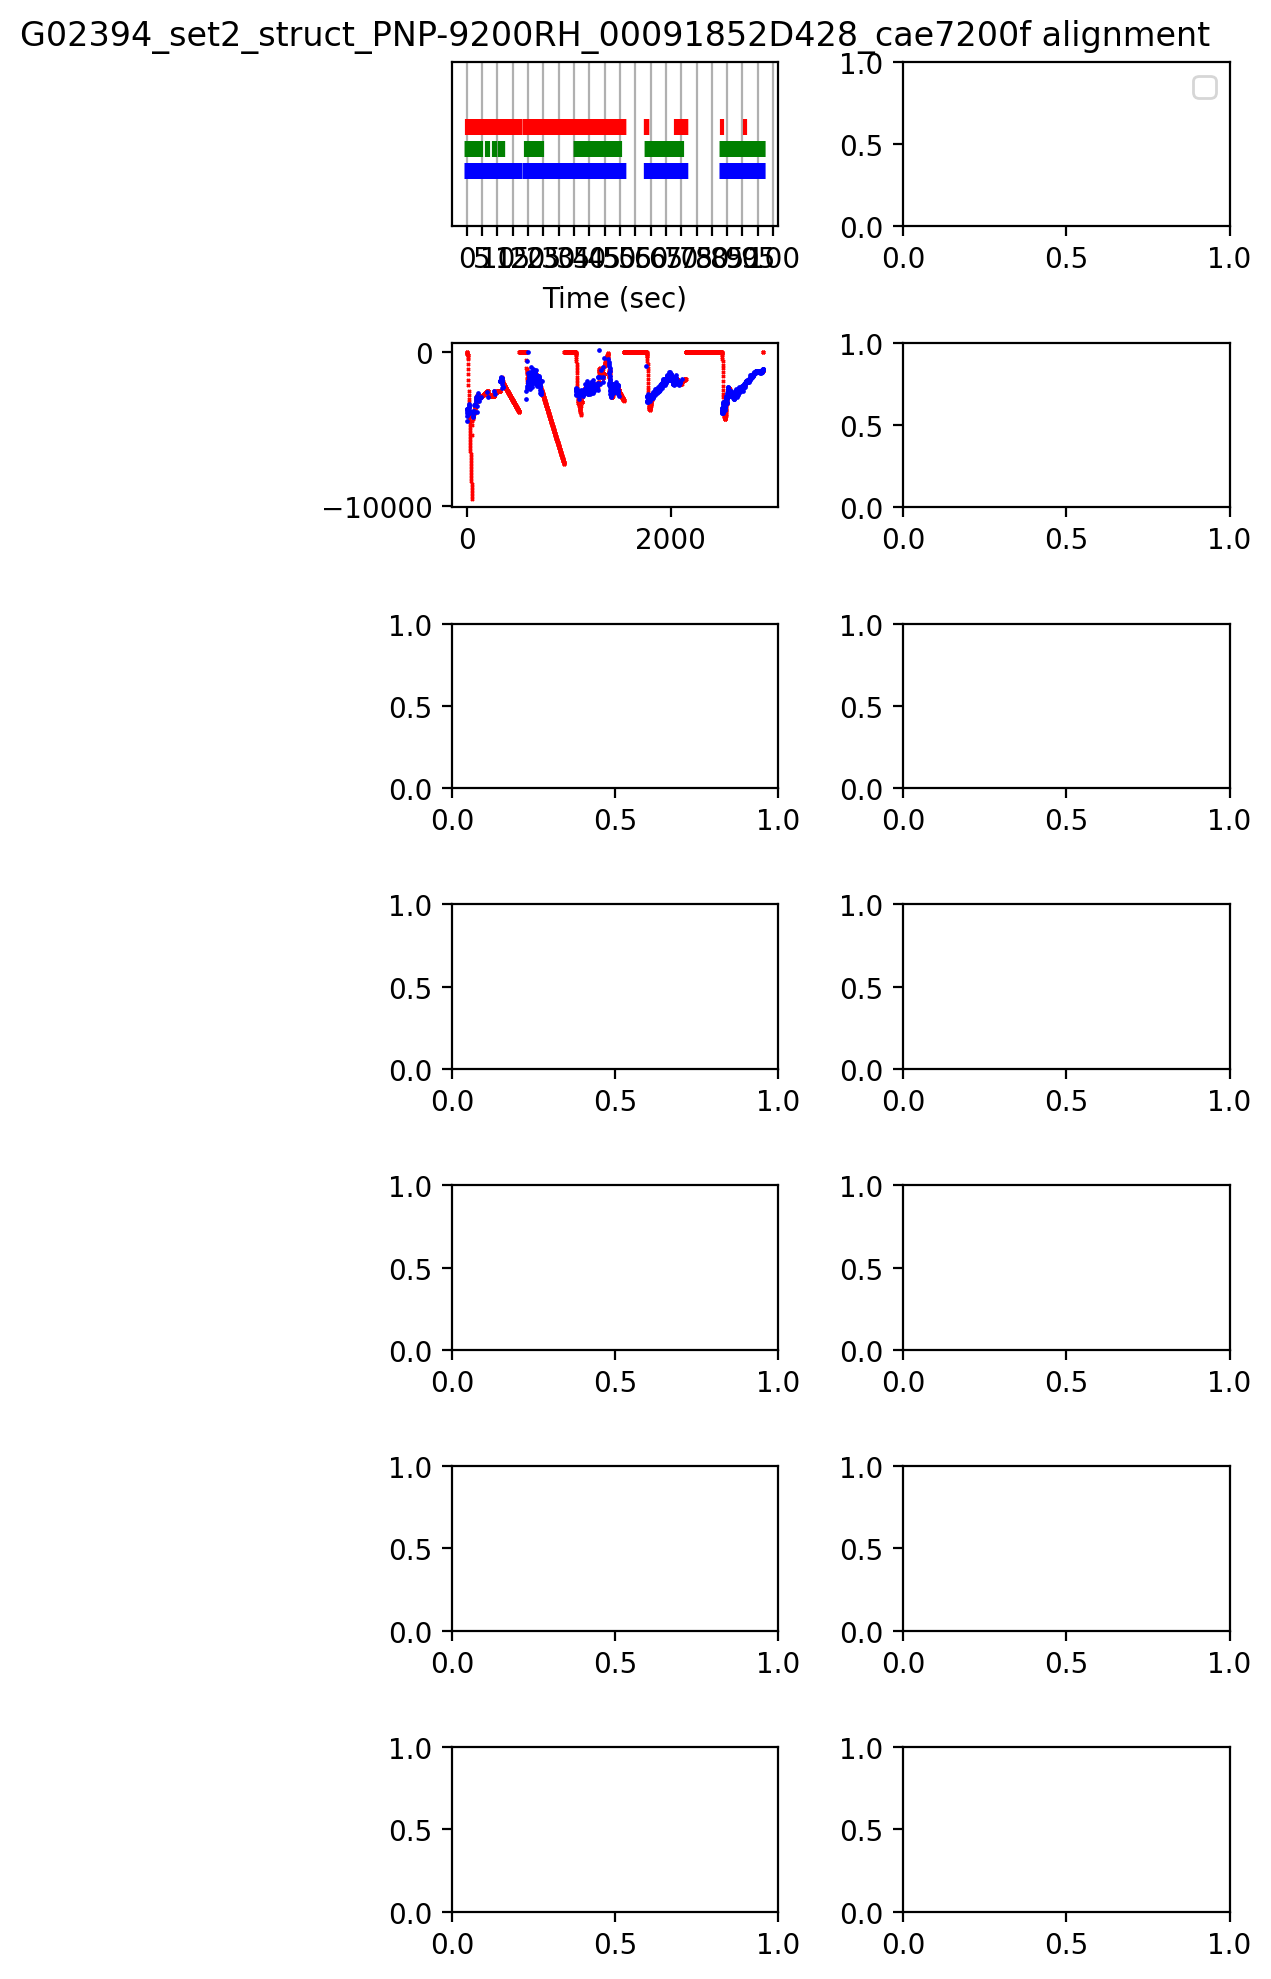

In [51]:
# combined figure
fig_combined, ax2 = plt.subplots(7, 2, facecolor='white', dpi=dpi, figsize=(5, 10))
ax2[0, 0].set_axisbelow(True)

offset = 0.01

ax2[0, 0].scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
ax2[0, 0].scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
ax2[0, 0].scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
ax2[0, 0].set_ylim([-0.025, 0.05])
ax2[0, 0].legend()
ax2[0, 0].set_xticks(range(0, 101, 5))
ax2[0, 0].set_yticks([])
ax2[0, 0].grid()
ax2[0, 0].set_xlabel('Time (sec)')
ax2[0, 0].set_title('G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

# start on the warp params
ax2[1, 0].scatter(range(0, kalman_filtered_warp.estimated_signal.shape[1]),
                                  kalman_filtered_warp.estimated_signal.transpose()[:, jj], s=0.3,
                                 marker='x',
                                 color='r',
              label='kalman filtered')
ax2[1, 0].scatter(original_frame_nums, original_warp_params[:, jj], s=0.5, color='b', label='mtcnn aligned')


fig_combined.tight_layout()

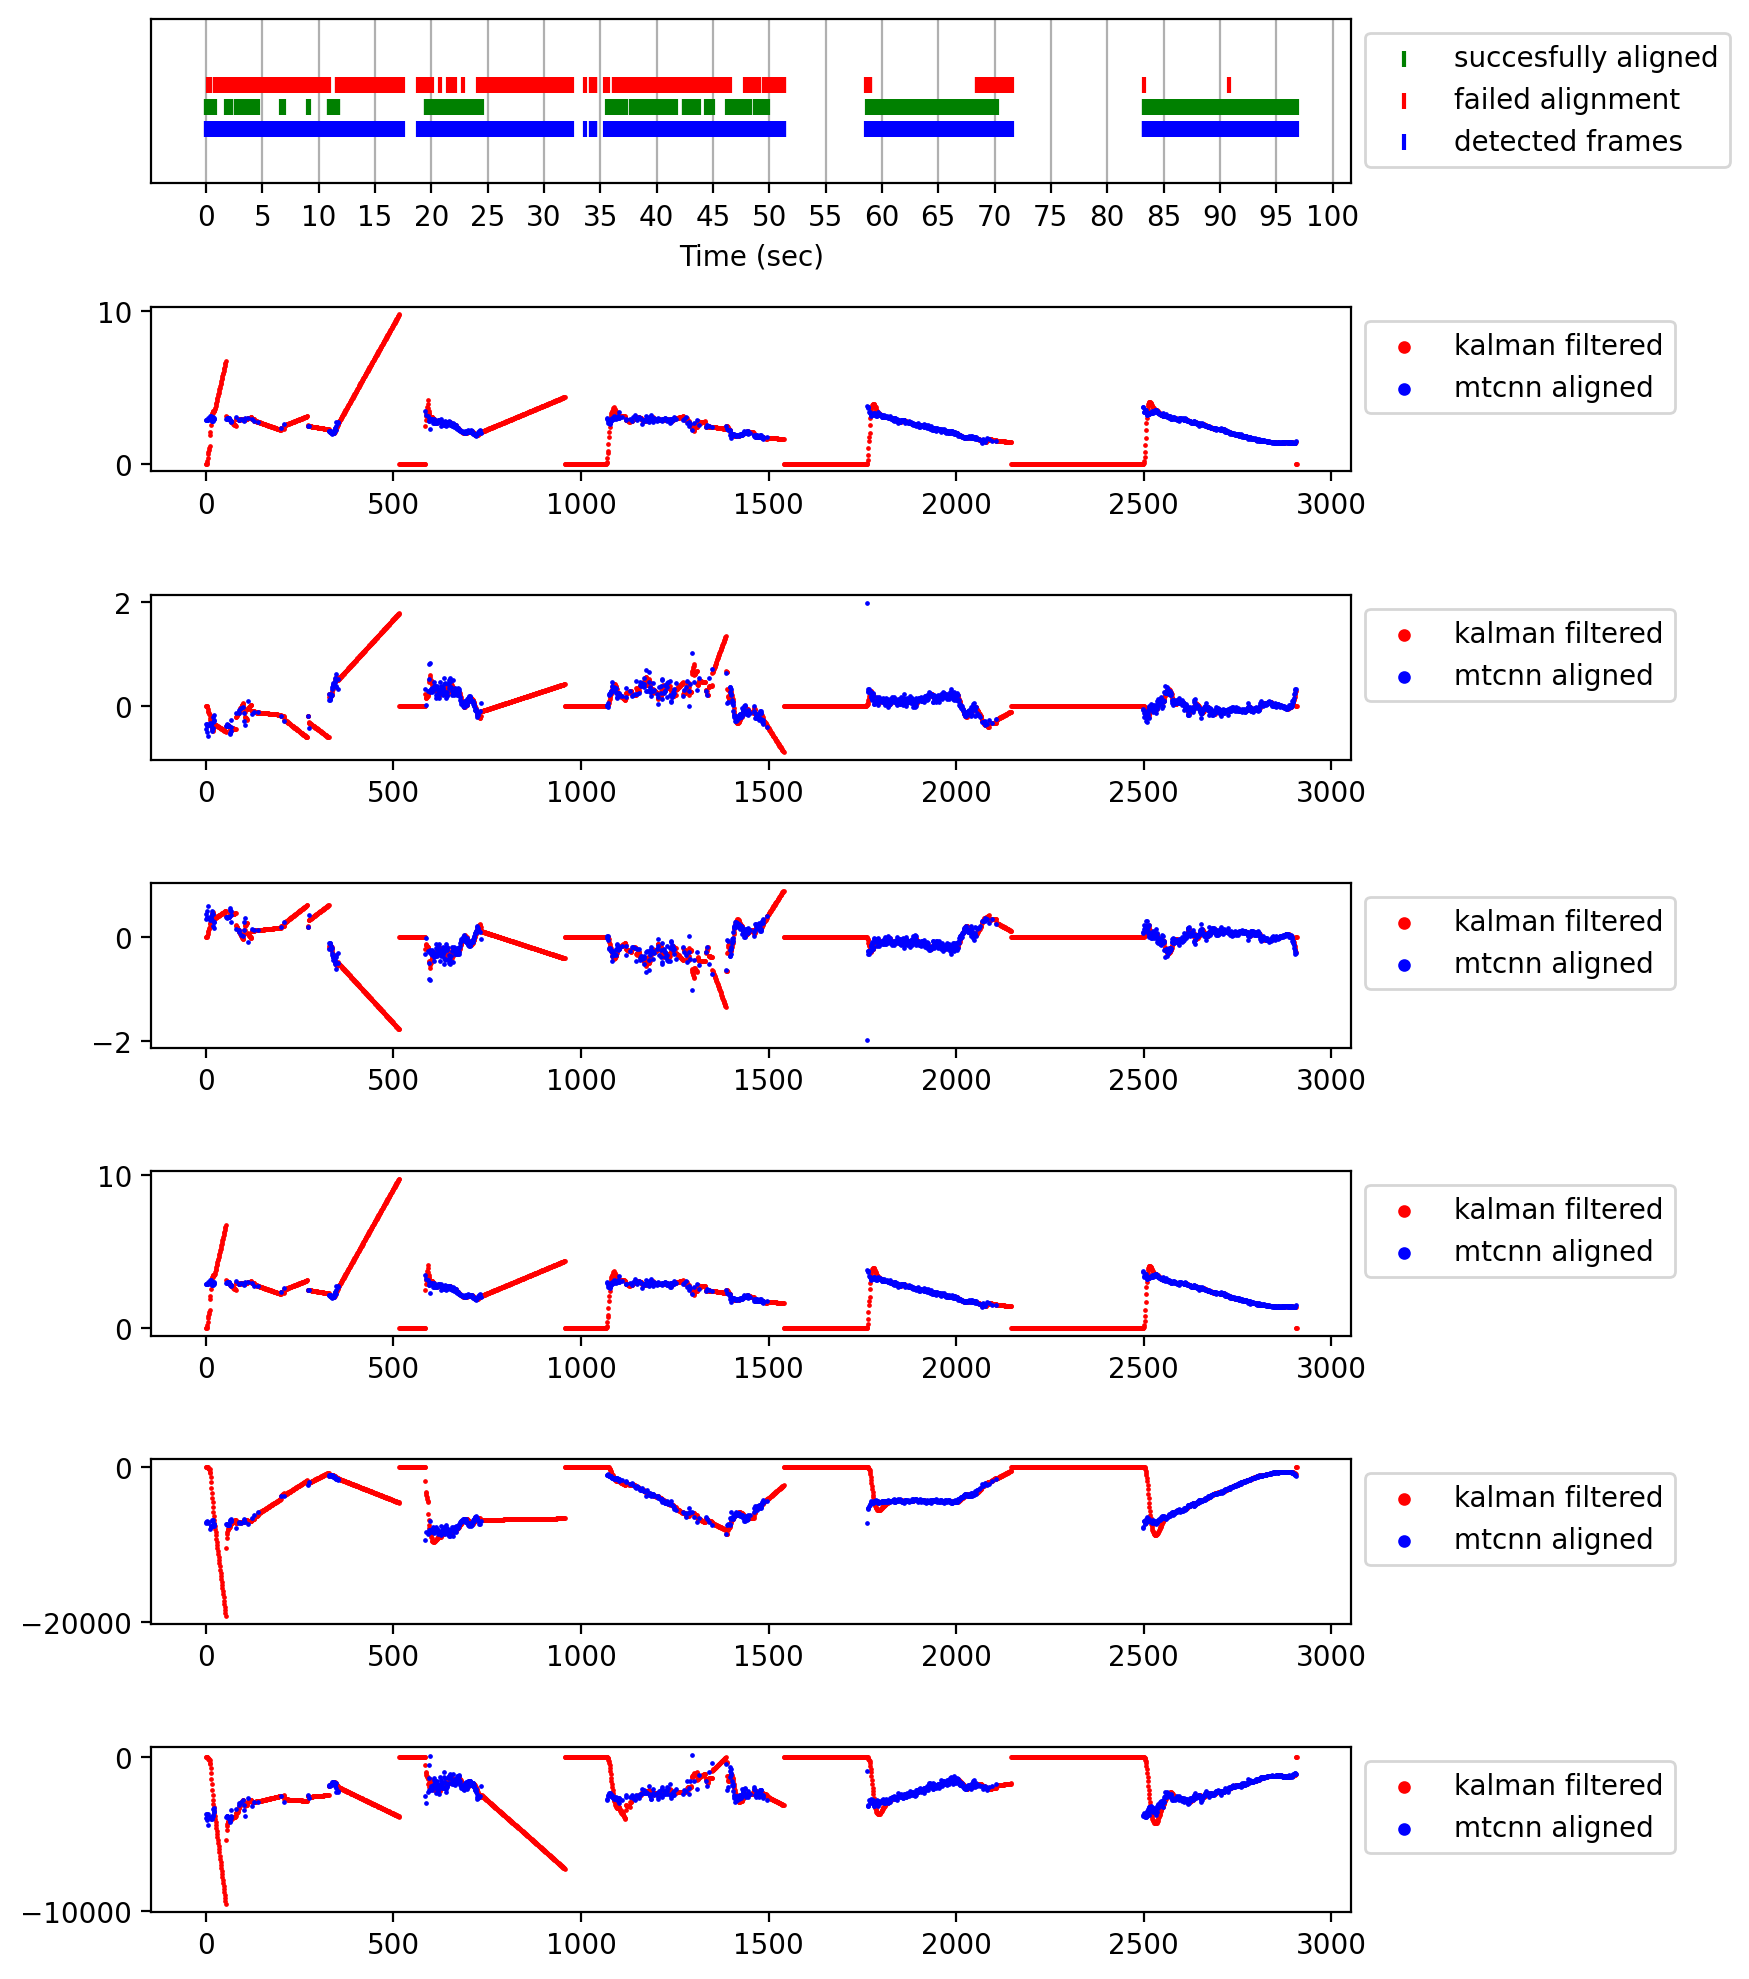

In [79]:
# combined figure
fig_combined = plt.figure(facecolor='white', dpi=dpi, figsize=(15, 10))

ax = plt.subplot(721)
ax.set_axisbelow(True)

offset = 0.01

plt.scatter(np.asarray(original_frame_nums) / 30, np.zeros(len(original_frame_nums))+offset, color='g',
            label='succesfully aligned', marker='|')
plt.scatter(np.asarray(missed_frame_nums) / 30, np.zeros(len(missed_frame_nums))+ 2* offset, color='r',
            label='failed alignment', marker='|')
plt.scatter(np.asarray(detected_frame_nums) / 30, np.zeros(len(detected_frame_nums)), color='b',
            label='detected frames', marker='|')
plt.ylim([-0.025, 0.05])
plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=1)
plt.xticks(range(0, 101, 5))
plt.yticks([])
plt.grid()
plt.xlabel('Time (sec)')
# plt.title('G02394_set2_struct_PNP-9200RH_00091852D428_cae7200f alignment')

# start on the warp params
for ii in range(0, 6):
    plt.subplot(7, 2, ii*2 + 3)
    plt.scatter(range(0, kalman_filtered_warp.estimated_signal.shape[1]),
                kalman_filtered_warp.estimated_signal.transpose()[:, ii], s=0.5,
                            color='r',
                  label='kalman filtered')
    plt.scatter(original_frame_nums, original_warp_params[:, ii], s=0.5, color='b', label='mtcnn aligned')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=5)


fig_combined.tight_layout()